In [8]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from keras.optimizers import Adam


In [9]:
from sklearn import datasets
cancerdata=datasets.load_breast_cancer()

In [10]:
import numpy as np
import pandas as pd


In [11]:
x=pd.DataFrame(data=cancerdata.data,columns=cancerdata.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y=cancerdata.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(512, 30)
(57, 30)
(512,)
(57,)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
x_train=x_train.reshape(512,30,1)
x_test=x_test.reshape(57,30,1)

In [21]:
model=Sequential()
model.add(Conv1D(16,2,activation='relu',input_shape=(30,1)))
model.add(Dropout(0.2))
model.add(Conv1D(32,2,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))



In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)


In [24]:
 history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1,callbacks=tf_callbacks)

Epoch 1/10


16/16 [==============================] - 15s 270ms/step - loss: 0.6408 - accuracy: 0.6523 - val_loss: 0.6058 - val_accuracy: 0.6491
Epoch 2/10
16/16 [==============================] - 1s 33ms/step - loss: 0.5897 - accuracy: 0.6836 - val_loss: 0.5545 - val_accuracy: 0.6842
Epoch 3/10
16/16 [==============================] - 0s 32ms/step - loss: 0.5377 - accuracy: 0.7129 - val_loss: 0.5068 - val_accuracy: 0.7719
Epoch 4/10
16/16 [==============================] - 1s 36ms/step - loss: 0.4973 - accuracy: 0.7539 - val_loss: 0.4614 - val_accuracy: 0.8421
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.4502 - accuracy: 0.7988 - val_loss: 0.4204 - val_accuracy: 0.8421
Epoch 6/10
16/16 [==============================] - 0s 31ms/step - loss: 0.4145 - accuracy: 0.8340 - val_loss: 0.3807 - val_accuracy: 0.8421
Epoch 7/10
16/16 [==============================] - 1s 52ms/step - loss: 0.3799 - accuracy: 0.8711 - val_loss: 0.3425 - val_accuracy: 0.9123
Epoch 8/1

In [26]:
%load_ext tensorboard 

In [30]:
 tensorboard --logdir logs/fit

Launching TensorBoard...

KeyboardInterrupt: 

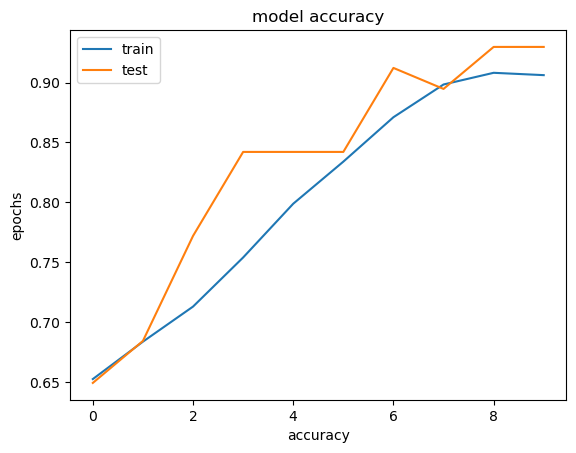

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

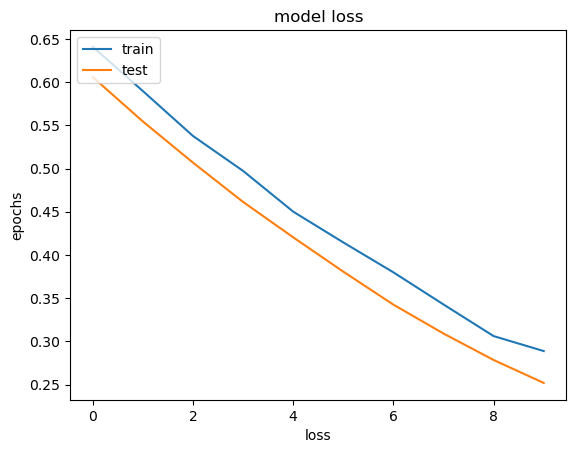

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()